## Práctica 2.1

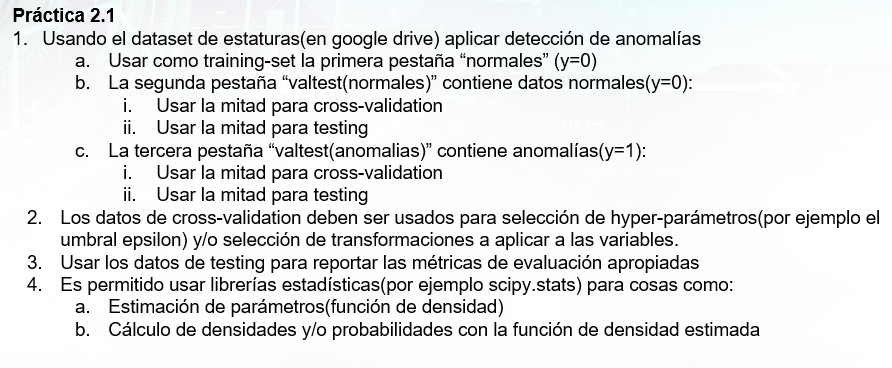

In [145]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow import keras

In [146]:
data_normales = pd.read_csv('normales.csv')
Val_norm = pd.read_csv('valtest_normales.csv')
Val_Anorm = pd.read_csv('valtest_anomalias.csv')


#DATA SPLIT
VT_Cross, VT_Test = train_test_split(Val_norm, test_size=0.5)
VA_Cross, VA_Test = train_test_split(Val_Anorm, test_size=0.5)

EstatC = np.vstack((np.array(VT_Cross),np.array(VA_Cross)))
EstatT = np.vstack((np.array(VT_Test),np.array(VA_Test)))
EstatL = np.concatenate((np.zeros(VT_Cross.shape[0]),np.ones(VA_Cross.shape[0])))

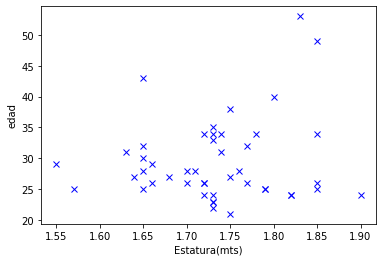

In [147]:
plt.xlabel('Estatura(mts)')
plt.ylabel('edad')
plt.plot(data_normales['Estatura(metros)'],data_normales['Edad(anios)'],'bx')
plt.show()

In [148]:
def estadistica(Data):
    Mean = np.mean(Data, axis=0)
    StandardD = np.cov(Data.T)    
    return Mean, StandardD

In [149]:
def prob_ocurrencia(Data,Mean, StandardD):
    return multivariate_normal(mean =Mean, cov= StandardD ).pdf(Data)

In [150]:
def Anomalia_Training(Data_Train, Data_Cross, Data_Label):
    
    m1, sd1 = estadistica(Data_Train)
    prob = prob_ocurrencia(Data_Train, m1,sd1)
    
    prob_a = prob_ocurrencia(Data_Cross, m1, sd1)
    
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(prob_a) - min(prob_a)) / 1000
    epsilons = np.arange(min(prob_a),max(prob_a),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (prob_a < epsilon) 
        f = f1_score(Data_Label, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    
    return best_f1, best_epsilon, m1, sd1


In [151]:
f1, epsilon, m, sd = Anomalia_Training(data_normales, EstatC, EstatL)



In [152]:
def Anomalia_Prediction(Data_Test, epsilon, m, sd):
    prob = Calculo_Densidad(Data_Test, m, sd)
            
    return prob<epsilon


In [153]:
DeteccionAnomalia = Anomalia_Prediction(EstatT, epsilon, m, sd)
print(DeteccionAnomalia)

[False False False False  True  True]


In [154]:
print("Anomalias Encontradas en la Data")
print(EstatT[DeteccionAnomalia])

Anomalias Encontradas en la Data
[[1.5e-01 2.5e+02]
 [1.5e+02 1.4e+01]]


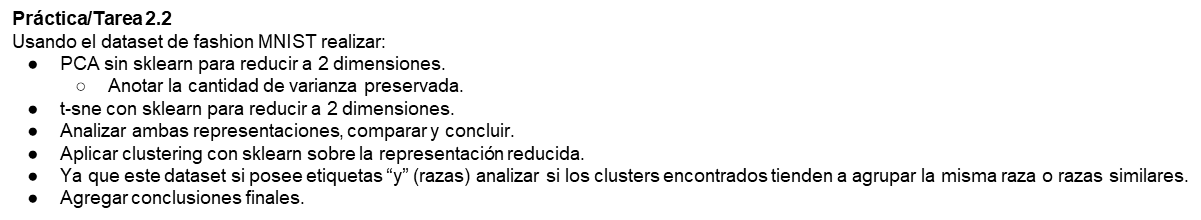

In [155]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [156]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [157]:
train_images[:5]
#df = pd.read_csv("fashion-mnist.csv")
#df.head()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [158]:

X = train_images#df.to_numpy()
Y = train_labels#X[:,4:5]
#X = X[:,0:4]


In [159]:
nsamples, nx, ny = X.shape
d2_train_dataset = X.reshape((nsamples,nx*ny))

In [160]:
X = d2_train_dataset

In [161]:
#Data Scaling
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729]])

In [162]:
#Análisis de Covarianza
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[1.00001667, 0.32375858, 0.10472712, ..., 0.00322519, 0.00655966,
        0.03258376],
       [0.32375858, 1.00001667, 0.56275636, ..., 0.03621546, 0.02953008,
        0.02061528],
       [0.10472712, 0.56275636, 1.00001667, ..., 0.05237603, 0.02799057,
        0.02434324],
       [0.04516479, 0.05944004, 0.34216394, ..., 0.01457848, 0.00239753,
        0.00784547],
       [0.02511261, 0.07074403, 0.15222495, ..., 0.02807517, 0.02254085,
        0.0071222 ]])

In [163]:
#Eigenvectors
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([173.13789644, 113.01260323,  42.81633652,  39.89596074,
        31.79084015])

In [164]:
vectors[:5]

array([[ 1.78224194e-04,  1.04521427e-05, -3.33640060e-04, ...,
        -1.61412148e-03,  6.32650500e-04,  3.47803855e-05],
       [ 1.02295806e-03, -1.60487876e-03, -9.03903362e-04, ...,
        -3.75630146e-04, -1.04649614e-03,  7.35905674e-04],
       [ 2.18629740e-03, -1.39523495e-03, -2.77778568e-03, ...,
         7.05226256e-04,  2.04000743e-04,  1.14710671e-03],
       [ 2.73173729e-03, -2.49433142e-03, -4.02459656e-03, ...,
        -6.83532098e-04,  1.60788275e-03, -9.06183431e-05],
       [ 3.62959393e-03, -3.32533748e-03, -5.04924678e-03, ...,
         2.09499348e-03, -6.16120672e-04,  1.64267816e-04]])

In [165]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values))

print(np.sum(explained_variances), '\n', explained_variances)    

1.0 
 [0.22083547297081768, 0.14414632613620493, 0.054611763922909534, 0.05088685689204776, 0.04054886517839387, 0.030195114539249102, 0.027475392867706606, 0.023136536370162157, 0.01692637137086229, 0.013180434481487289, 0.011701032851537826, 0.009623643401333343, 0.009064410449148986, 0.00861006487685116, 0.007430075933803324, 0.007303247800740441, 0.006615575977620721, 0.0063151525589352, 0.006219384788114719, 0.005842828072368017, 0.005233883945851565, 0.005111211444430644, 0.004735333947633066, 0.004500796489672492, 0.004387040291745802, 0.004170857387761251, 0.00398339911259969, 0.003905448029305433, 0.003776646261465873, 0.003735263572783793, 0.0036311799948251454, 0.003516210972794163, 0.0033604153563222975, 0.003309246128772657, 0.003280431522738629, 0.003175054534509753, 0.003052054495316332, 0.0029666088120843975, 0.002846946594838489, 0.0028306768115146357, 0.0027558621824483828, 0.002681357800497735, 0.00262373329276368, 0.0025452999989279, 0.0024752157437349506, 0.0024024

In [167]:
#Visualizacion de datos
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])

res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = Y
res.head()

,PC1,PC2,Y
0,-0.801175,-20.866749,9
1,17.074206,4.968512,0
2,-9.601641,12.296101,0
3,-0.311206,11.576765,3
4,8.963833,12.867738,0


C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1'>

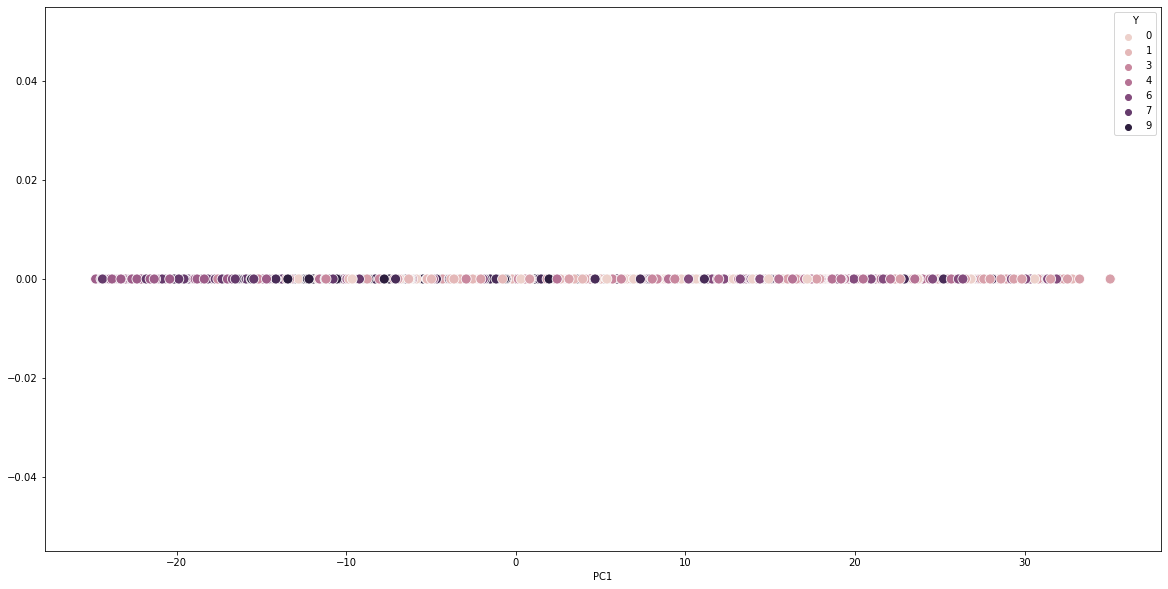

In [168]:
plt.figure(figsize =(20,10))
sns.scatterplot(res['PC1'], [0]*len(res) , hue=res['Y'], s=100)